# Trabalho final da Disciplina Aprendizagem de Máquina
# Aluno - Francisco Flávio Cardoso Gomes

In [46]:
from numpy import array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


In [16]:
import gzip
import shutil
import requests
import os
from os import listdir
from os.path import isfile,join,abspath

In [17]:
url = 'https://data.brasil.io/dataset/covid19/caso_full.csv.gz'

In [18]:
def download_data():
    r = requests.get(url, allow_redirects=True)
    open('data.csv.gz', 'wb').write(r.content)

def unzip_data():
    with gzip.open('data.csv.gz', 'rb') as f_in:
        with open('data.csv', 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)

In [19]:
download_data()

In [20]:
unzip_data()

In [21]:
import pandas as pd

data = pd.read_csv('data.csv')
data=data[(data['state'] == 'CE') & data['city'].isna()]
data

,city,city_ibge_code,date,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
63607,NaN,23.0,2020-03-16,202012,9187103.0,9132078.0,False,False,9,0.09796,2020-03-16,0.0000,0,1,state,CE,9,0
63610,NaN,23.0,2020-03-17,202012,9187103.0,9132078.0,False,False,10,0.10885,2020-03-17,0.0000,0,2,state,CE,1,0
63614,NaN,23.0,2020-03-18,202012,9187103.0,9132078.0,False,False,19,0.20681,2020-03-18,0.0000,0,3,state,CE,9,0
63619,NaN,23.0,2020-03-19,202012,9187103.0,9132078.0,False,False,24,0.26124,2020-03-19,0.0000,0,4,state,CE,5,0
63626,NaN,23.0,2020-03-20,202012,9187103.0,9132078.0,False,False,68,0.74017,2020-03-20,0.0000,0,5,state,CE,44,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120566,NaN,23.0,2021-02-18,202107,9187103.0,9132078.0,False,False,405710,4416.08198,2021-02-18,0.0269,10896,340,state,CE,-2845,28
120752,NaN,23.0,2021-02-19,202107,9187103.0,9132078.0,False,False,406973,4429.82951,2021-02-19,0.0268,10922,341,state,CE,1263,26
120938,NaN,23.0,2021-02-20,202107,9187103.0,9132078.0,False,False,408692,4448.54052,2021-02-20,0.0268,10944,342,state,CE,1719,22
121124,NaN,23.0,2021-02-21,202108,9187103.0,9132078.0,False,False,410907,4472.65041,2021-02-21,0.0267,10968,343,state,CE,2215,24


In [22]:
data = data.rename(columns={'last_available_confirmed': 'N. de Casos'})
data['N. de Casos'].head()

63607     9
63610    10
63614    19
63619    24
63626    68
Name: N. de Casos, dtype: int64

In [23]:
seq=data['N. de Casos']

In [24]:
type(seq)
seq = seq.tolist()
print(seq)

[9, 10, 19, 24, 68, 84, 125, 164, 185, 211, 237, 282, 322, 359, 382, 401, 445, 563, 658, 745, 960, 1045, 1188, 1394, 1445, 1558, 1668, 1747, 1935, 2070, 2291, 2412, 2747, 3062, 3306, 3485, 3682, 4116, 4702, 5121, 5667, 6260, 6783, 6985, 7409, 7861, 8000, 8309, 8379, 11040, 11470, 12310, 13888, 15134, 15879, 16692, 17599, 18412, 19156, 21077, 23059, 23795, 24255, 26363, 28112, 30560, 31413, 34573, 35122, 35595, 36185, 37021, 37275, 37821, 38395, 47822, 48489, 50504, 54683, 56056, 59795, 62176, 63575, 64271, 66218, 69023, 71947, 74692, 75784, 76429, 76833, 79853, 82169, 85606, 88132, 90441, 92397, 92866, 94708, 98055, 99578, 103118, 105270, 107064, 107593, 108225, 110483, 114038, 116519, 118311, 121464, 121986, 123394, 126142, 129598, 131324, 134610, 136001, 136790, 137234, 139437, 141832, 144058, 146064, 146972, 147378, 147818, 151072, 154381, 156265, 159953, 161844, 162086, 162429, 165703, 169138, 171565, 174662, 176371, 176773, 176972, 179976, 182453, 184100, 186563, 188289, 188638, 1

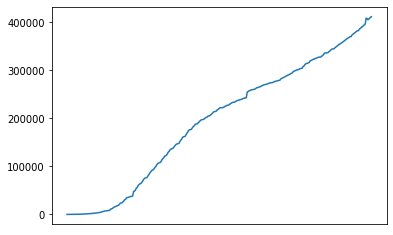

In [27]:
plt.plot(data['date'],data['N. de Casos'])
plt.xticks([])
plt.show()

In [ ]:
data.count()

In [28]:
def split_sequence(sequence, passos):
    X, y = list(), list()
    for i in range(len(sequence)):
        fim = i + passos
        if(fim > len(sequence)-1):
            break
        seq_x, seq_y = sequence[i:fim], sequence[fim]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [29]:
passos=30

In [30]:
X,y = split_sequence(seq,passos)

In [31]:
n_features = 1
X = X.reshape((X.shape[0], X.shape[1],n_features))

In [32]:
model = tf.keras.models.Sequential()
model.add(LSTM(100, activation='relu',input_shape=(passos,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [33]:
model.fit(X,y,epochs=50)

Epoch 1/50
10/10 [==============================] - 2s 25ms/step - loss: 9678487272.7273 - mse: 9678487272.7273
Epoch 2/50
10/10 [==============================] - 0s 24ms/step - loss: 3532802373.8182 - mse: 3532802373.8182
Epoch 3/50
10/10 [==============================] - 0s 24ms/step - loss: 27336783319.2727 - mse: 27336783319.2727
Epoch 4/50
10/10 [==============================] - 0s 24ms/step - loss: 4089165405.0909 - mse: 4089165405.0909
Epoch 5/50
10/10 [==============================] - 0s 35ms/step - loss: 15370761960.7273 - mse: 15370761960.7273
Epoch 6/50
10/10 [==============================] - 0s 24ms/step - loss: 4677841640.7273 - mse: 4677841640.7273
Epoch 7/50
10/10 [==============================] - 0s 25ms/step - loss: 27396741026.9091 - mse: 27396741026.9091
Epoch 8/50
10/10 [==============================] - 0s 25ms/step - loss: 5775570152.7273 - mse: 5775570152.7273
Epoch 9/50
10/10 [==============================] - 0s 25ms/step - loss: 4966352011.6364 - mse: 49

In [34]:
prox=X[100]
#prox = array([70,80,90])
prox = prox.reshape((1,passos,n_features))
model.predict(prox)

array([[122485.98]], dtype=float32)

##Inserir um segundo Parâmetro

In [67]:
ones = [1 for i in range(len(seq))]
print(ones)
print(seq)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [72]:

# Inserindo o numero 1 na lista seq
res = [] 
for idx in range(0, len(seq)): 
    res.append(seq[idx]) 
    res.append(ones[idx]) 
  
# printing result 
print(res)


[9, 1, 10, 1, 19, 1, 24, 1, 68, 1, 84, 1, 125, 1, 164, 1, 185, 1, 211, 1, 237, 1, 282, 1, 322, 1, 359, 1, 382, 1, 401, 1, 445, 1, 563, 1, 658, 1, 745, 1, 960, 1, 1045, 1, 1188, 1, 1394, 1, 1445, 1, 1558, 1, 1668, 1, 1747, 1, 1935, 1, 2070, 1, 2291, 1, 2412, 1, 2747, 1, 3062, 1, 3306, 1, 3485, 1, 3682, 1, 4116, 1, 4702, 1, 5121, 1, 5667, 1, 6260, 1, 6783, 1, 6985, 1, 7409, 1, 7861, 1, 8000, 1, 8309, 1, 8379, 1, 11040, 1, 11470, 1, 12310, 1, 13888, 1, 15134, 1, 15879, 1, 16692, 1, 17599, 1, 18412, 1, 19156, 1, 21077, 1, 23059, 1, 23795, 1, 24255, 1, 26363, 1, 28112, 1, 30560, 1, 31413, 1, 34573, 1, 35122, 1, 35595, 1, 36185, 1, 37021, 1, 37275, 1, 37821, 1, 38395, 1, 47822, 1, 48489, 1, 50504, 1, 54683, 1, 56056, 1, 59795, 1, 62176, 1, 63575, 1, 64271, 1, 66218, 1, 69023, 1, 71947, 1, 74692, 1, 75784, 1, 76429, 1, 76833, 1, 79853, 1, 82169, 1, 85606, 1, 88132, 1, 90441, 1, 92397, 1, 92866, 1, 94708, 1, 98055, 1, 99578, 1, 103118, 1, 105270, 1, 107064, 1, 107593, 1, 108225, 1, 110483, 1, 

In [73]:

seq = np.reshape(res, (-1, 2))
print(seq)

[[     9      1]
 [    10      1]
 [    19      1]
 [    24      1]
 [    68      1]
 [    84      1]
 [   125      1]
 [   164      1]
 [   185      1]
 [   211      1]
 [   237      1]
 [   282      1]
 [   322      1]
 [   359      1]
 [   382      1]
 [   401      1]
 [   445      1]
 [   563      1]
 [   658      1]
 [   745      1]
 [   960      1]
 [  1045      1]
 [  1188      1]
 [  1394      1]
 [  1445      1]
 [  1558      1]
 [  1668      1]
 [  1747      1]
 [  1935      1]
 [  2070      1]
 [  2291      1]
 [  2412      1]
 [  2747      1]
 [  3062      1]
 [  3306      1]
 [  3485      1]
 [  3682      1]
 [  4116      1]
 [  4702      1]
 [  5121      1]
 [  5667      1]
 [  6260      1]
 [  6783      1]
 [  6985      1]
 [  7409      1]
 [  7861      1]
 [  8000      1]
 [  8309      1]
 [  8379      1]
 [ 11040      1]
 [ 11470      1]
 [ 12310      1]
 [ 13888      1]
 [ 15134      1]
 [ 15879      1]
 [ 16692      1]
 [ 17599      1]
 [ 18412      1]
 [ 19156      

In [74]:
#seq = [[10,1],[20,1],[30,1],[40,1],[50,1],[60,1],[70,1],[80,1],[90,1]]
print(len(seq))

344


In [75]:
def split_sequence(sequence, passos):
    X, y = list(), list()
    for i in range(len(sequence)):
        fim = i + passos
        if(fim > len(sequence)-1):
            break
        seq_x, seq_y = sequence[i:fim], sequence[fim][0]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [79]:
passos=30
X,y = split_sequence(seq,passos)

In [81]:
n_features = 2
X = X.reshape((X.shape[0], X.shape[1],n_features))

In [82]:
model = tf.keras.models.Sequential()
model.add(LSTM(100, activation='relu',input_shape=(passos,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [83]:
model.fit(X,y,epochs=200)

Epoch 1/200
10/10 [==============================] - 1s 24ms/step - loss: 154695285294.5454 - mse: 154695285294.5454
Epoch 2/200
10/10 [==============================] - 0s 22ms/step - loss: 152186979048.7273 - mse: 152186979048.7273
Epoch 3/200
10/10 [==============================] - 0s 22ms/step - loss: 40944286254.5455 - mse: 40944286254.5455
Epoch 4/200
10/10 [==============================] - 0s 23ms/step - loss: 37599615720.7273 - mse: 37599615720.7273
Epoch 5/200
10/10 [==============================] - 0s 24ms/step - loss: 28301146856.7273 - mse: 28301146856.7273
Epoch 6/200
10/10 [==============================] - 0s 23ms/step - loss: 73517706146.9091 - mse: 73517706146.9091
Epoch 7/200
10/10 [==============================] - 0s 23ms/step - loss: 33518298949.8182 - mse: 33518298949.8182
Epoch 8/200
10/10 [==============================] - 0s 22ms/step - loss: 29754222312.7273 - mse: 29754222312.7273
Epoch 9/200
10/10 [==============================] - 0s 23ms/step - loss: 23

In [84]:
prox=X[100]
#prox = array([70,80,90])
prox = prox.reshape((1,passos,n_features))
model.predict(prox)




array([[128731.29]], dtype=float32)